# Tax distributions

Describe distributions of tax rates in each county. Tax rates were calculated by taking taxamount/taxvaluedollaramount from the Zillow SQL database

In [14]:
import env
import wrangle
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set_style('whitegrid') # doing my work in dark background
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm


In [4]:
url = wrangle.get_db_url('zillow')


#### Create tax rate distributions. Tax distribution rate for fips = 6037

In [8]:
query_6037 = """SELECT taxamount/taxvaluedollarcnt as tax_rate_6037, fips
           FROM properties_2017
           JOIN predictions_2017 using(parcelid)
           WHERE (propertylandusetypeid = 261) and (transactiondate BETWEEN '2017-05-01' and '2017-06-30') and fips = 6037"""

df = pd.read_sql(query_6037,url)
df = df.dropna()


In [10]:
df.tax_rate_6037.value_counts(bins = 50) 
df.tax_rate_6037.value_counts().idxmax()
df.tax_rate_6037.describe() 

count    9629.000000
mean        0.014173
std         0.007660
min         0.001071
25%         0.012121
50%         0.012635
75%         0.014401
max         0.452884
Name: tax_rate_6037, dtype: float64

count    9629.000000
mean        0.014173
std         0.007660
min         0.001071
25%         0.012121
50%         0.012635
75%         0.014401
max         0.452884
Name: tax_rate_6037, dtype: float64

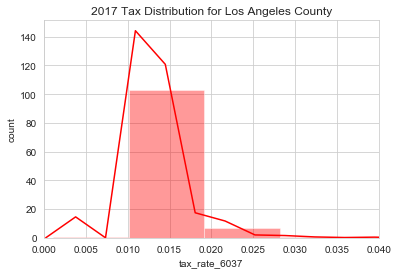

In [16]:
sns.distplot(df.tax_rate_6037, bins = 50, color = 'Red')
plt.xlim(0,0.04)
plt.ylabel('count')
plt.title('2017 Tax Distribution for Los Angeles County')

df.tax_rate_6037.describe() 

#### Tax distribution rate for fips = 6059

In [17]:
query_6059 = """ SELECT taxamount/taxvaluedollarcnt as tax_rate_6059
from properties_2017
JOIN predictions_2017 using(parcelid)
WHERE (propertylandusetypeid = 261) and (transactiondate BETWEEN '2017-05-01' and '2017-06-30') and fips = 6059"""

df = pd.read_sql(query_6059,url)


count    4109.000000
mean        0.012121
std         0.003218
min         0.001712
25%         0.010616
50%         0.011524
75%         0.012529
max         0.107350
Name: tax_rate_6059, dtype: float64

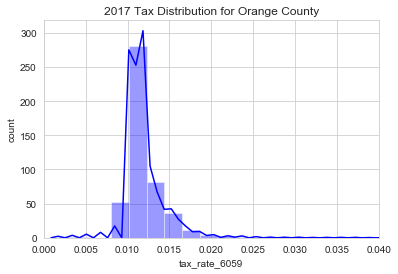

In [21]:
sns.distplot(df.tax_rate_6059, color = 'Blue')
plt.xlim(0,0.04)

plt.ylabel('count')
plt.title('2017 Tax Distribution for Orange County')

df.tax_rate_6059.describe() 


#### Tax distribution rate for fips = 6059

In [24]:
query_6111 = """SELECT taxamount/taxvaluedollarcnt as tax_rate_6111
                From properties_2017
                JOIN predictions_2017 using(parcelid)
                WHERE (propertylandusetypeid = 261) and (transactiondate BETWEEN '2017-05-01' and '2017-06-30') and fips = 6111"""

df = pd.read_sql(query_6111,url)

,tax_rate_6111
count,1297.000000
mean,0.012051
std,0.008269
min,0.000787
25%,0.010740
50%,0.011249
75%,0.011925
max,0.294865


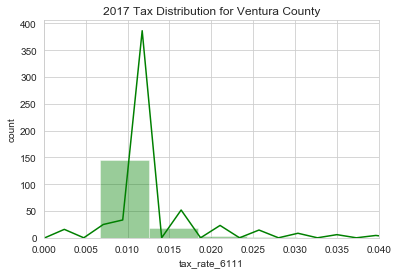

In [27]:
sns.distplot(df.tax_rate_6111, color = 'Green')
plt.xlim(0,0.04)

plt.ylabel('count')
plt.title('2017 Tax Distribution for Ventura County')

pd.DataFrame(df.tax_rate_6111.describe())

